# House Price Prediction using Supervised Learning

**Overall description:**

A comprehensive implementation of various machine learning techniques to predict house prices,
including data preprocessing, model selection, evaluation, and hyperparameter tuning using the following dataset:
- House dataset


## 1 - Dataset Loading and Identification


1. House data set from https://drive.google.com/file/d/1B6dxFy65A1xFrObh2fWpGHoa9TN9RjAe/view?usp=sharing






In [ ]:
import pandas as pd
import numpy as np

housing_data = pd.read_csv('Housing.csv')

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(housing_data.head())

First few rows of the dataset:
   area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  7420       4.0        2.0        3      yes        no       no   
1  8960       4.0        4.0        4      yes        no       no   
2  9960       3.0        2.0        2      yes        no      yes   
3  7500       4.0        2.0        2      yes        no      yes   
4  7420       4.0        1.0        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus     price  
0              no             yes        2      yes        furnished  13300000  
1              no             yes        3       no        furnished  12250000  
2              no              no        2      yes   semi-furnished  12250000  
3              no             yes        3      yes        furnished  12215000  
4              no             yes        2       no        furnished  11410000  


In [ ]:
# Display dataset information to understand its structure
print("\nDataset Information:")
print(housing_data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              545 non-null    int64  
 1   bedrooms          529 non-null    float64
 2   bathrooms         527 non-null    float64
 3   stories           545 non-null    int64  
 4   mainroad          545 non-null    object 
 5   guestroom         545 non-null    object 
 6   basement          536 non-null    object 
 7   hotwaterheating   525 non-null    object 
 8   airconditioning   545 non-null    object 
 9   parking           545 non-null    int64  
 10  prefarea          545 non-null    object 
 11  furnishingstatus  545 non-null    object 
 12  price             545 non-null    int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 55.5+ KB
None


In [ ]:
# Display summary statistics to understand the numerical features
print("\nSummary Statistics:")
print(housing_data.describe())


Summary Statistics:
               area    bedrooms   bathrooms     stories     parking  \
count    545.000000  529.000000  527.000000  545.000000  545.000000   
mean    5150.541284    2.964083    1.290323    1.805505    0.693578   
std     2170.141023    0.736389    0.505823    0.867492    0.861586   
min     1650.000000    1.000000    1.000000    1.000000    0.000000   
25%     3600.000000    2.000000    1.000000    1.000000    0.000000   
50%     4600.000000    3.000000    1.000000    2.000000    0.000000   
75%     6360.000000    3.000000    2.000000    2.000000    1.000000   
max    16200.000000    6.000000    4.000000    4.000000    3.000000   

              price  
count  5.450000e+02  
mean   4.766729e+06  
std    1.870440e+06  
min    1.750000e+06  
25%    3.430000e+06  
50%    4.340000e+06  
75%    5.740000e+06  
max    1.330000e+07  


The provided dataset, "Housing.csv," is ideally suited for a regression analysis. The primary reason lies in the nature of the target variable, house price. As a continuous numerical value, house price can be effectively predicted using regression techniques. The dataset's various features, including area, bedrooms, bathrooms, mainroad, and guestroom, serve as relevant predictors that can be used to model the relationship between these factors and the house price. This combination of continuous target variable and informative predictors makes regression a well-suited approach for analysing and predicting house prices in this dataset.

## 2 - Data Analysis and Preprocessing

1.  Analyse the chosen dataset and identify the types of features in the dataset (e.g., numerical, categorical, text) and their respective roles.

2. Analyze the dataset to identify any data quality issues or transformations needed. Based on your analysis, perform appropriate data preprocessing tasks to prepare the data for modeling.

3. Provide visualisations to support your data analysis, including but not limited to distribution plots, correlation plots, and feature importance graphs.



In [ ]:
# Import necessary libraries for data analysis and visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Check feature types (numerical, categorical)
numerical_features = housing_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = housing_data.select_dtypes(include=['object']).columns.tolist()


In [ ]:
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)

# Check for missing values and handle them if necessary
print("\nMissing Values:")
print(housing_data.isnull().sum())


Numerical Features: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
Categorical Features: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

Missing Values:
area                 0
bedrooms            16
bathrooms           18
stories              0
mainroad             0
guestroom            0
basement             9
hotwaterheating     20
airconditioning      0
parking              0
prefarea             0
furnishingstatus     0
price                0
dtype: int64


In [ ]:
# Handling missing values
# For numerical features, using median to avoid outlier influence
housing_data[numerical_features] = housing_data[numerical_features].fillna(housing_data[numerical_features].median())

# For categorical features, using mode to fill missing values
housing_data[categorical_features] = housing_data[categorical_features].fillna(housing_data[categorical_features].mode().iloc[0])


Median was choosen to remove the missing values from the numerical features because it is less sensitive to outliers and mode was used for the categorical ones because it represents the most common value, which is a reasonable guess for missing categorical values in this context.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

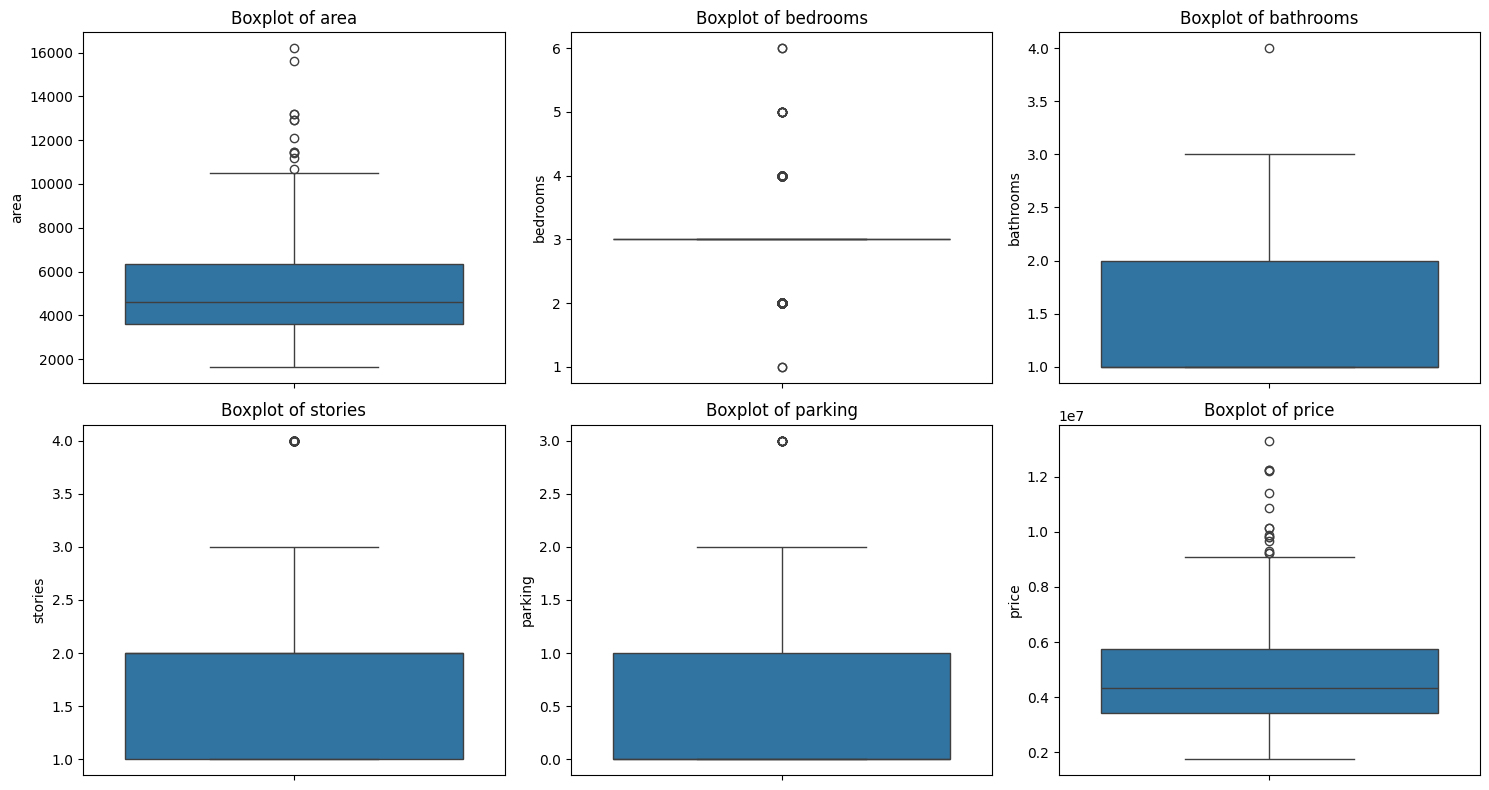

In [ ]:
# Analyze the dataset for outliers using boxplots for numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, len(numerical_features) // 2, i + 1)
    sns.boxplot(y=housing_data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Boxplots were chosen to quickly identify outliers and understand the distribution of numerical features. This visualization is crucial for data preprocessing as it helps determine which features need outlier treatment

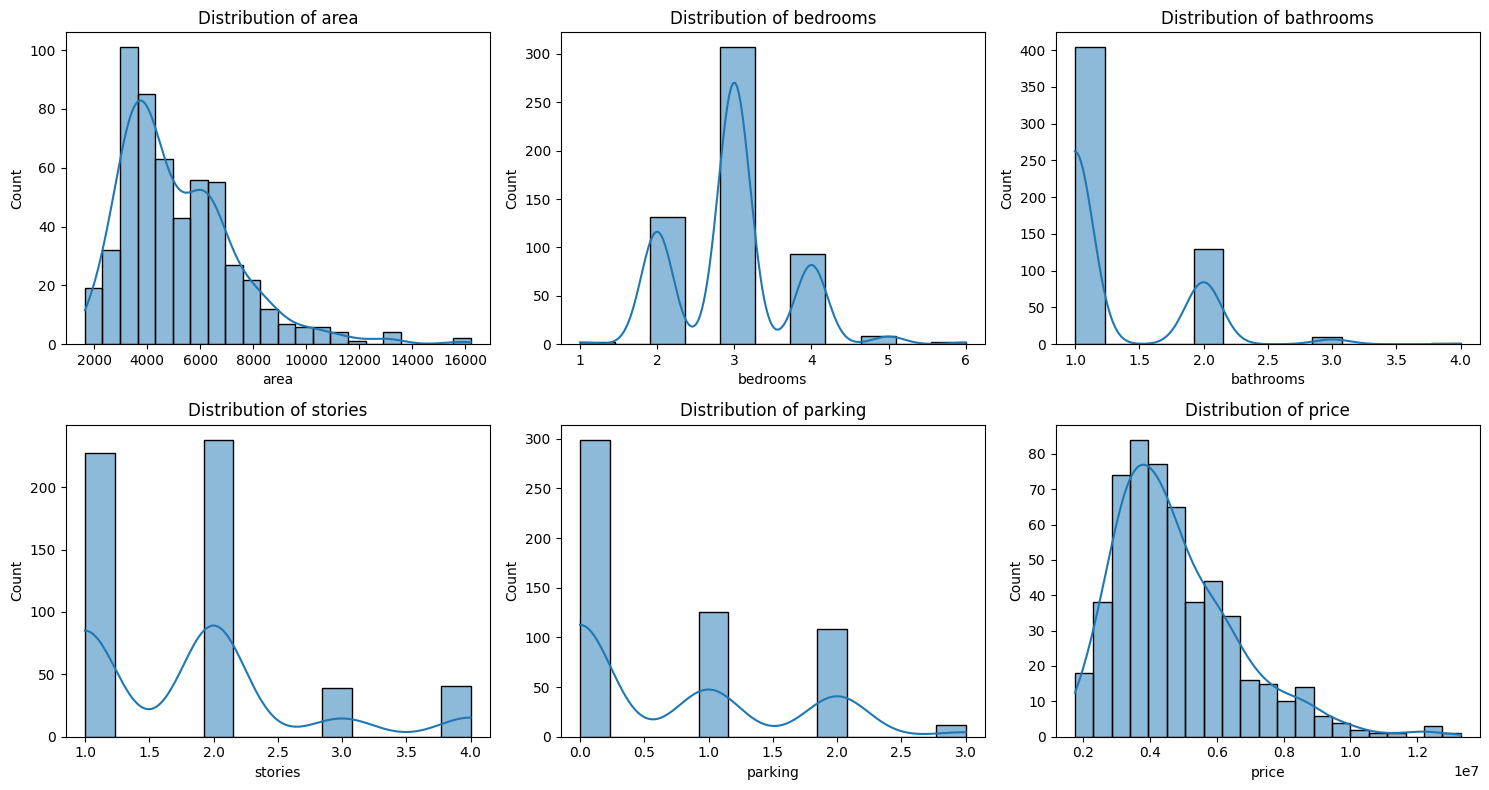

In [ ]:
# Visualize distributions of numerical features
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(2, len(numerical_features) // 2, i + 1)
    sns.histplot(housing_data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Distribution plots with KDE (Kernel Density Estimation) were used to understand the shape and skewness of each numerical feature. This helps inform our feature transformation decisions and validates assumptions about data normality required by many machine learning algorithms.

In [ ]:
# Outlier Removal using IQR (Interquartile Range) method
def remove_outliers(df, numerical_columns):
    for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Removing outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [ ]:
# Applying the function to remove outliers
# List of columns where outliers should be removed
columns_to_remove_outliers = ['area', 'price', 'stories', 'parking']
housing_data = remove_outliers(housing_data, columns_to_remove_outliers)

# Checking the dataset after outlier removal
print("\nDataset after outlier removal:")
print(housing_data.describe())


Dataset after outlier removal:
               area    bedrooms   bathrooms     stories     parking  \
count    472.000000  472.000000  472.000000  472.000000  472.000000   
mean    4764.709746    2.908898    1.222458    1.622881    0.584746   
std     1802.630520    0.727212    0.445887    0.626507    0.774611   
min     1650.000000    1.000000    1.000000    1.000000    0.000000   
25%     3480.000000    2.000000    1.000000    1.000000    0.000000   
50%     4300.000000    3.000000    1.000000    2.000000    0.000000   
75%     6000.000000    3.000000    1.000000    2.000000    1.000000   
max    10500.000000    6.000000    3.000000    3.000000    2.000000   

              price  
count  4.720000e+02  
mean   4.373888e+06  
std    1.453198e+06  
min    1.750000e+06  
25%    3.358250e+06  
50%    4.200000e+06  
75%    5.244750e+06  
max    8.890000e+06  


The IQR method was chosen because it's a robust statistical method that doesn't assume a normal distribution. It was applied to 'area', 'stories', 'parking' and 'price' since these attributes from the visualisation appear to have significant outliers that could skew the models.

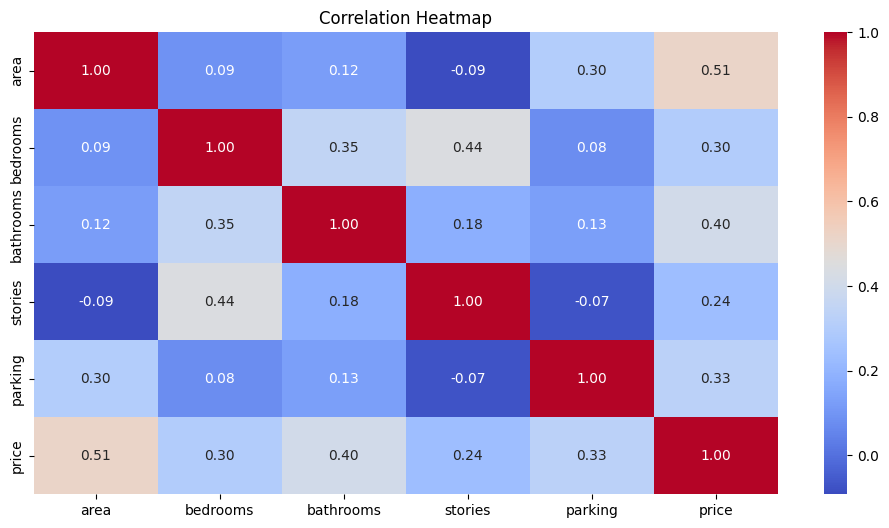

In [ ]:
# Correlation heatmap to understand relationships between numerical features
plt.figure(figsize=(12, 6))
sns.heatmap(housing_data[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap is essential for understanding relationships between numerical features. It helps identify potential multicollinearity issues and informs feature selection decisions. The coolwarm colormap was chosen for its intuitive representation of positive and negative correlations.

In [ ]:
# Encoding categorical features using One-Hot Encoding
housing_data_encoded = pd.get_dummies(housing_data, columns=categorical_features, drop_first=True)

In [ ]:
# Feature Engineering - (create a new feature)
housing_data_encoded['area_per_bedroom'] = housing_data_encoded['area'] / housing_data_encoded['bedrooms']

The feature 'area_per_bedroom' was created to capture the spaciousness of the house, which could be a significant factor in determining house prices.

In [ ]:
print("\nData after encoding categorical features:")
print(housing_data_encoded.head())


Data after encoding categorical features:
    area  bedrooms  bathrooms  stories  parking    price  mainroad_yes  \
18  4600       3.0        2.0        2        2  8890000          True   
19  6420       3.0        2.0        2        1  8855000          True   
20  4320       3.0        1.0        2        2  8750000          True   
21  7155       3.0        2.0        1        2  8680000          True   
22  8050       3.0        1.0        1        1  8645000          True   

    guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
18           True         False                False                 True   
19          False         False                False                 True   
20          False          True                 True                False   
21           True          True                False                 True   
22           True          True                False                 True   

    prefarea_yes  furnishingstatus_semi-furnished

In [ ]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features_to_scale = ['bedrooms', 'bathrooms', 'stories', 'parking']
housing_data_encoded[numerical_features_to_scale] = scaler.fit_transform(housing_data_encoded[numerical_features_to_scale])

# Log transform of the target variable (price)
housing_data_encoded['log_area'] = np.log(housing_data_encoded['area'])

Log transformation is used for area data to help normalise the distribution and reduce the impact of extreme values, also potentially improving model performance.

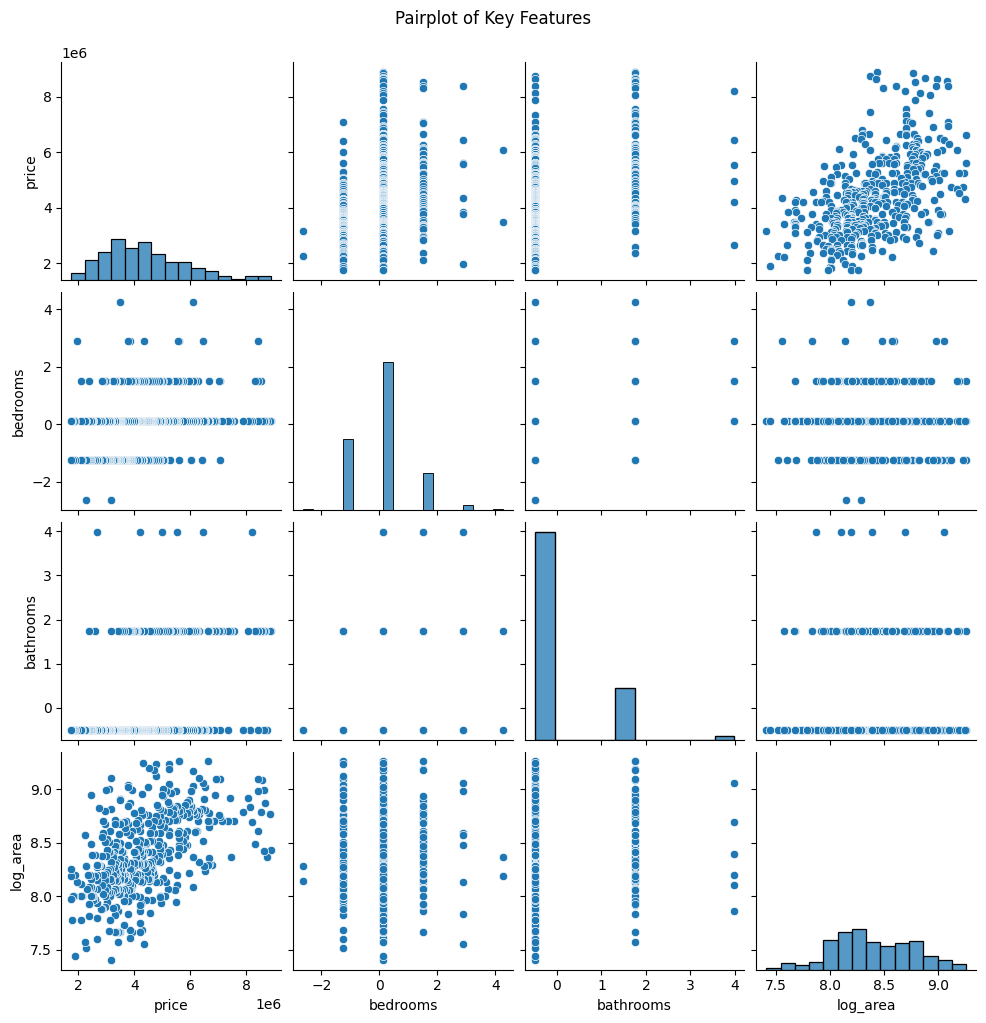

In [ ]:
# Pairplot to visualize relationships between features
sns.pairplot(housing_data_encoded[['price', 'bedrooms', 'bathrooms', 'log_area']])
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()

The pairplot provides a comprehensive view of bivariate relationships between our key features, along with their individual distributions. This single visualization effectively combines multiple aspects of our exploratory data analysis:

- Shows the distribution of each variable on the diagonal
- Displays relationships between all pairs of variables
- Helps identify any non-linear relationships that might need special attention in modeling
- Includes the crucial price vs. area relationship along with other important feature interactions


## 3 - Model Selection

1.  Select and implement at least four different supervised learning models suitable for the chosen dataset.
2. Choose appropriate evaluation metrics for each model.



In [ ]:
# Import necessary libraries for model implementation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Separate the features and the target variable
X = housing_data_encoded.drop(['price'], axis=1)
y = housing_data_encoded['price']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialise models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'Kernel Ridge Regression': KernelRidge(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'XGBoost Regressor': xgb.XGBRegressor()
}

# Dictionary to store the performance of each model
model_performance = {}

In [ ]:
# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    model_performance[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'R-squared': r2
    }


In [ ]:
# Display the performance of each model
print("\nModel Performance:")
for model_name, metrics in model_performance.items():
    print(f"\n{model_name}:")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value:.4f}")


Model Performance:

Linear Regression:
MAE: 732022.5504
MSE: 879165861986.8943
R-squared: 0.6605

Decision Tree Regressor:
MAE: 901791.5789
MSE: 1765881269894.7368
R-squared: 0.3181

Random Forest Regressor:
MAE: 777819.8965
MSE: 1120765163313.4670
R-squared: 0.5672

Gradient Boosting Regressor:
MAE: 818479.8339
MSE: 1091653291305.1265
R-squared: 0.5785

Kernel Ridge Regression:
MAE: 742805.0081
MSE: 903287872508.3265
R-squared: 0.6512

K-Nearest Neighbors Regressor:
MAE: 1098327.2632
MSE: 1963918263697.8948
R-squared: 0.2416

XGBoost Regressor:
MAE: 894277.8526
MSE: 1386996357758.7302
R-squared: 0.4644


For evaluation, we used Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared:

MAE provides an easily interpretable measure of the average prediction error.
MSE penalizes larger errors more heavily, which can be useful in housing price prediction where large errors are particularly undesirable.
R-squared gives us an idea of how much of the variance in the target variable our model explains.

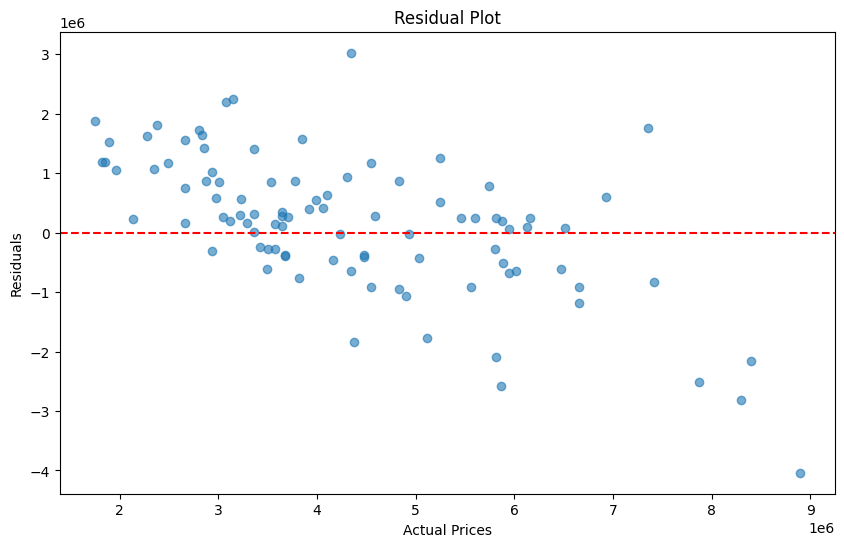

In [ ]:
# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred - y_test, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')  # Line of perfect prediction
plt.show()

The residual plot is essential for model evaluation as it helps assess the quality of our predictions and validate model assumptions. This visualization:

- Shows whether our model's errors are randomly distributed (a key assumption for linear regression)
- Helps identify any patterns in prediction errors
- Reveals if the model's performance varies across different price ranges
- Assists in detecting potential heteroscedasticity issues

The red dashed line at y=0 provides a reference for perfect predictions, making it easier to interpret the magnitude and direction of prediction errors.


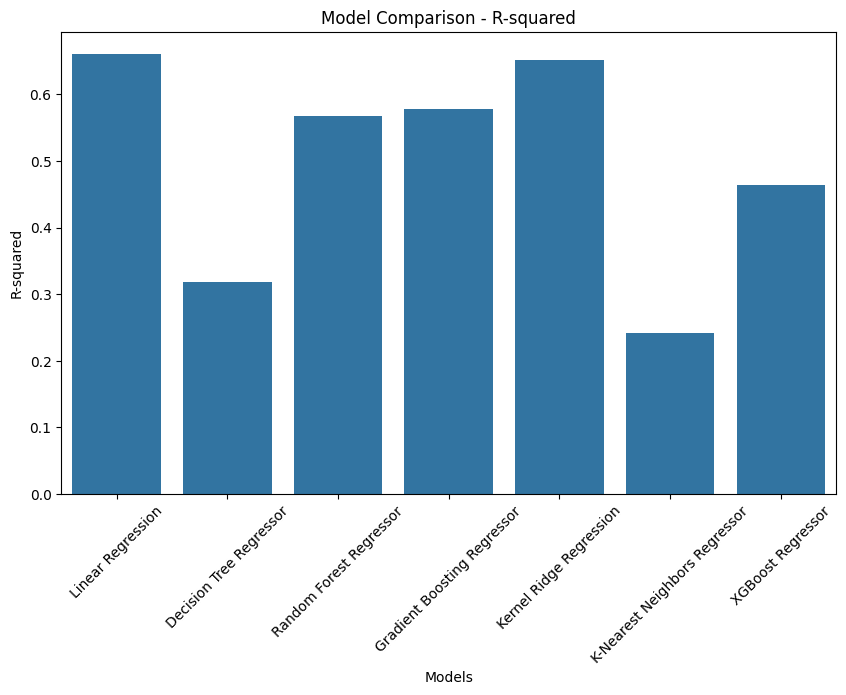

In [ ]:
# Model Comparison
model_comparison_df = pd.DataFrame(model_performance).T  # Transpose for better readability
model_comparison_df = model_comparison_df[['MAE', 'MSE', 'R-squared']]

# Visualize model comparison (example using bar plot for R-squared)
plt.figure(figsize=(10, 6))
sns.barplot(x=model_comparison_df.index, y='R-squared', data=model_comparison_df)
plt.xlabel('Models')
plt.title('Model Comparison - R-squared')
plt.xticks(rotation=45)
plt.show()

The Linear Regression model has emerged as the best-performing model in this analysis. It shows the lowest Mean Absolute Error (MAE) and Mean Squared Error (MSE), indicating greater accuracy in its predictions compared to the other models. Furthermore, it achieves the highest R-squared value, suggesting a superior fit to the data and a stronger capacity to explain the variance in the target variable.

## 4 - Hyperparameter Tuning:

1. For the best-performing model, perform hyperparameter tuning (at least three different types of parameters) using techniques such as Grid Search or Random Search.
2. Document the tuning process and the best hyperparameters found.

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge Regression
param_grid = {
    'alpha': [1e-10, 1e-8, 0.1, 1, 10, 20, 50, 100, 150],  # Reduced range and more spaced out
    'fit_intercept': [True, False],
    'solver': ['svd', 'cholesky', 'lsqr', 'saga'],
    'tol': [1e-3, 1e-2, 1e-4],  # Focus on smaller tolerance values for better convergence
    'max_iter': [100000, 20000, 50000]
}

In [ ]:
# Initialize the Ridge Regression model
ridge = Ridge()

I chose Ridge regression due to its effectiveness in handling multicollinearity, as the dataset includes correlated features. Ridge applies L2 regularization, which stabilises coefficient estimates and helps prevent overfitting while retaining all predictors. This allows us to leverage the information from all features, making the model more robust and generalisable.

In [ ]:
# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid,
                           scoring='r2', cv=15, n_jobs=-1, verbose=2)

In [ ]:
# Perform Grid Search to find the best hyperparameters
grid_search.fit(X_train, y_train)

Fitting 15 folds for each of 648 candidates, totalling 9720 fits


GridSearchCV(cv=15, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [1e-10, 1e-08, 0.1, 1, 10, 20, 50, 100, 150],
                         'fit_intercept': [True, False],
                         'max_iter': [100000, 20000, 50000],
                         'solver': ['svd', 'cholesky', 'lsqr', 'saga'],
                         'tol': [0.001, 0.01, 0.0001]},
             scoring='r2', verbose=2)

GridSearchCV was chosen because it performs an exhaustive search over specified parameter values. While it can be computationally expensive, it ensures we don't miss any optimal combination of parametres

In [ ]:
# Best parameters and best score from Grid Search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"\nBest Hyperparameters: {best_params}")
print(f"Best Cross-Validation R-squared: {best_score:.4f}")


Best Hyperparameters: {'alpha': 1e-08, 'fit_intercept': True, 'max_iter': 100000, 'solver': 'cholesky', 'tol': 0.001}
Best Cross-Validation R-squared: 0.4919


## 5 - Training and Testing:

1. Train the best model using the optimal hyperparameters.
2. Evaluate the model's performance on a test set and provide performance metrics.
3. Visualize the testing results to better understand the model's performance.

In [ ]:
# Retrieve the best hyperparameters from the previous step
best_alpha = best_params['alpha']
best_fit_intercept = best_params['fit_intercept']
best_solver = best_params['solver']
best_tol = best_params['tol']
best_max_iter = best_params['max_iter']

# Initialize the Gradient Boosting Regressor model with the best hyperparameters
best_model = Ridge(
    alpha=best_params['alpha'],
    fit_intercept=best_params['fit_intercept'],
    solver=best_params['solver'],
    tol=best_params['tol'],
    max_iter=best_params['max_iter'],

)

In [ ]:
# Train the model with the optimal hyperparameters on the full training set
best_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_model.predict(X_test)

In [ ]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nPerformance of the Best Gradient Boosting Regressor:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Performance of the Best Gradient Boosting Regressor:
Mean Absolute Error (MAE): 732022.5505
Mean Squared Error (MSE): 879165862104.6531
R-squared (R²): 0.6605


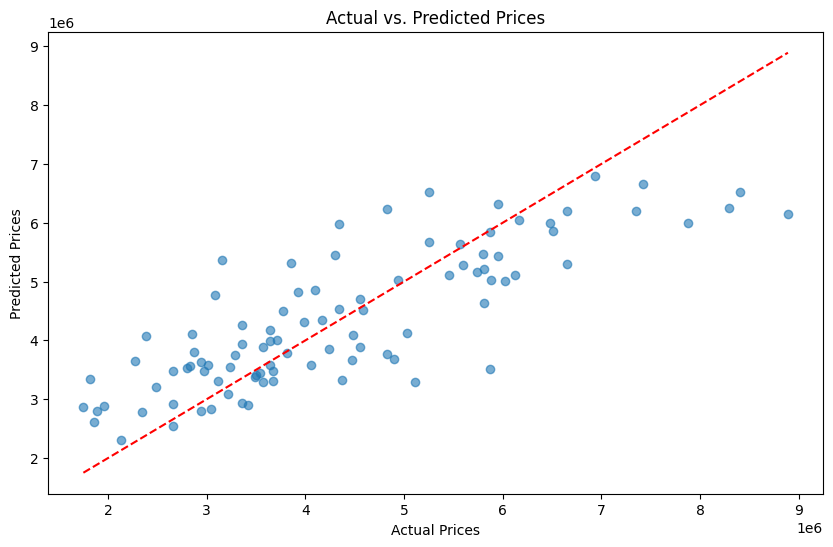

In [ ]:
# Visualize the results: Actual vs. Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Line of perfect prediction
plt.show()

## 6- Discussion of potential improvements and future work



# Model Performance Evaluation

Throughout this assignment, several challenges were encountered that influenced model performance. Initially, Random Forest and XGBoost regressors were evaluated; however, they demonstrated suboptimal performance based on key evaluation metrics, including Mean Absolute Error (MAE), Mean Squared Error (MSE), and R². A potential contributing factor to this underperformance may be that the dataset did not exhibit sufficiently complex relationships for these models to effectively capture non-linearities. Consequently, simpler models, such as Ridge regression, may have been more suitable given the dataset's characteristics.

## Areas for Improvement

Despite the challenges faced, there are multiple avenues for enhancing the model and approach:

1. **Outlier and Missing Data Handling**: The primary limitation identified was the management of outliers and missing data. Although basic imputation techniques were implemented, more sophisticated methods, such as K-Nearest Neighbours (KNN) imputation or robust scaling techniques, could potentially yield improved results by more effectively addressing outliers [1].

2. **Feature Selection**: Further refinement in feature selection is warranted. The inclusion of irrelevant or redundant features may have diluted the model's performance. Techniques such as Recursive Feature Elimination (RFE) or leveraging domain knowledge to engineer new features could enhance model accuracy [2].

3. **Hyperparameter Tuning**: While a grid search was conducted for hyperparameter tuning, utilizing more advanced optimization techniques, such as Randomised Search or Bayesian optimization, may identify superior hyperparameter values more efficiently [3].

4. **Model Exploration**: Testing a broader range of models, including Ensemble Learning methods that combine the strengths of Ridge and other regressors, could lead to improved performance [4].

5. **Evaluation Metrics**: The evaluation metrics utilized in this assignment primarily focused on error-based measures (MAE, MSE). To gain a more comprehensive understanding of model performance, additional metrics such as Mean Absolute Percentage Error (MAPE) or adjusted R² should be considered. Furthermore, implementing cross-validation with a higher number of folds would help mitigate variance in the results, providing a more reliable estimate of the model's generalization ability [5].

## Conclusion

In summary, while Ridge regression outperformed both Random Forest and XGBoost in this instance, there are significant opportunities for enhancement in data preprocessing, feature engineering, and model tuning. These improvements could lead to more accurate and robust predictions in future analyses.

## References

1. Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*, 12, 2825–2830.
2. Guyon, I., & Elisseeff, A. (2003). An Introduction to Variable and Feature Selection. *Journal of Machine Learning Research*, 3, 1157–1182.
3. Bergstra, J., & Bengio, Y. (2012). Random Search for Hyper-Parameter Optimisation. *Journal of Machine Learning Research*, 13, 281–305.
4. Dietterich, T. G. (2000). Ensemble Methods in Machine Learning. *International Workshop on Multiple Classifier Systems*, 1–15.
5. Kohavi, R. (1995). A Study of Cross-Validation and Bootstrap for Accuracy Estimation and Model Selection. *Proceedings of the 14th International Joint Conference on Artificial Intelligence*, 1137–1145.
